<a href="https://colab.research.google.com/github/nikhilreddybilla28/Ads-and-Sales-Data-Analysis/blob/master/cricket_baseball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
folder = 'cricket'
file = 'cricket.txt'

In [ ]:
path = Path('data/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
path.ls()

[PosixPath('data/cricket')]

In [ ]:
folder = 'baseball'
file = 'baseball.txt'

In [ ]:
path = Path('data/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
path.ls()

[PosixPath('data/cricket')]

In [ ]:
download_images(path/file, dest, max_pics=200)

In [ ]:
classes = ['baseball','cricket']

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

baseball


cricket


# DATA

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [ ]:
data.classes

['baseball', 'cricket']

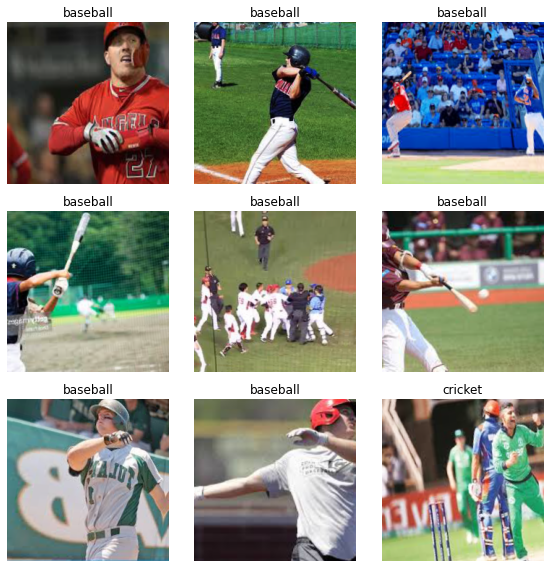

In [ ]:
data.show_batch(rows=3, figsize=(8,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['baseball', 'cricket'], 2, 192, 48)

# Train

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.355205,0.359051,0.125000,00:03
1,0.344337,0.297215,0.104167,00:03
2,0.300881,0.308351,0.125000,00:03
3,0.272894,0.317222,0.125000,00:03


In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

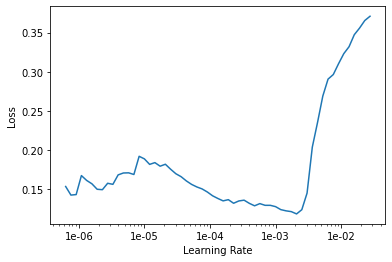

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2,max_lr=slice(1e-05,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.174333,0.418598,0.145833,00:03
1,0.147409,0.397164,0.104167,00:03


In [ ]:
learn.save('res34')

# Interpret

In [ ]:
learn.load('res34');


In [ ]:
ip= ClassificationInterpretation.from_learner(learn)

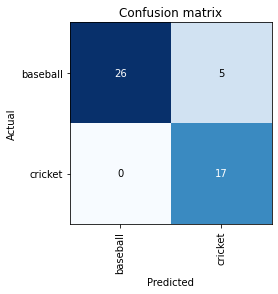

In [ ]:
ip.plot_confusion_matrix()

# clean up

In [ ]:
from fastai.widgets import *

In [ ]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [ ]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('res34');

In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [ ]:
ImageCleaner(ds,idxs,path)

'No images to show :)'

In [ ]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [ ]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

  #  

In [ ]:
learn.export()

In [ ]:
defaults.device = torch.device('cpu')

In [ ]:
learn = load_learner(path,'export.pkl')

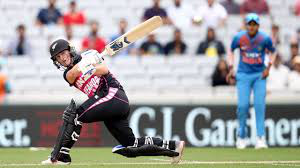

In [ ]:
img = open_image(path/'test'/'c3.jpeg')
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'baseball'